In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#train and test 
from sklearn.model_selection import train_test_split
#the Model 
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings("ignore")

# Data Clean and Preprocossing 

In [504]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [506]:
df.shape

(614, 13)

In [507]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [508]:
df=df.dropna()

In [509]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [510]:
df.duplicated().sum()

0

In [511]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,480.0,5364.231250,5668.251251,150.0,2898.75,3859.0,5852.50,81000.0
CoapplicantIncome,480.0,1581.093583,2617.692267,0.0,0.00,1084.5,2253.25,33837.0
LoanAmount,480.0,144.735417,80.508164,9.0,100.00,128.0,170.00,600.0
Loan_Amount_Term,480.0,342.050000,65.212401,36.0,360.00,360.0,360.00,480.0
Credit_History,480.0,0.854167,0.353307,0.0,1.00,1.0,1.00,1.0


In [512]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [513]:
# EDA

Text(0.5, 1.0, 'Gender Distribution')

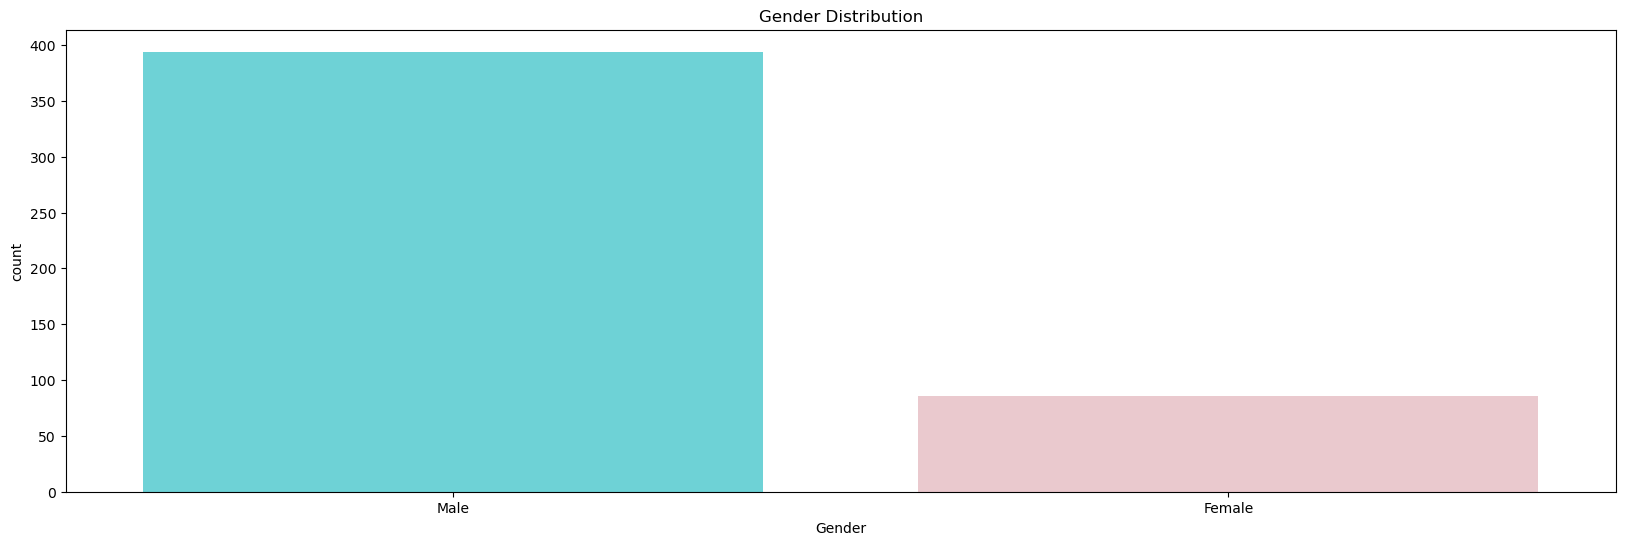

In [514]:
plt.figure(figsize=(20,6))
color=["#5DE2E7","#EFC3CA"]
sns.barplot(df.Gender.value_counts(),palette=color)
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Married Distribution')

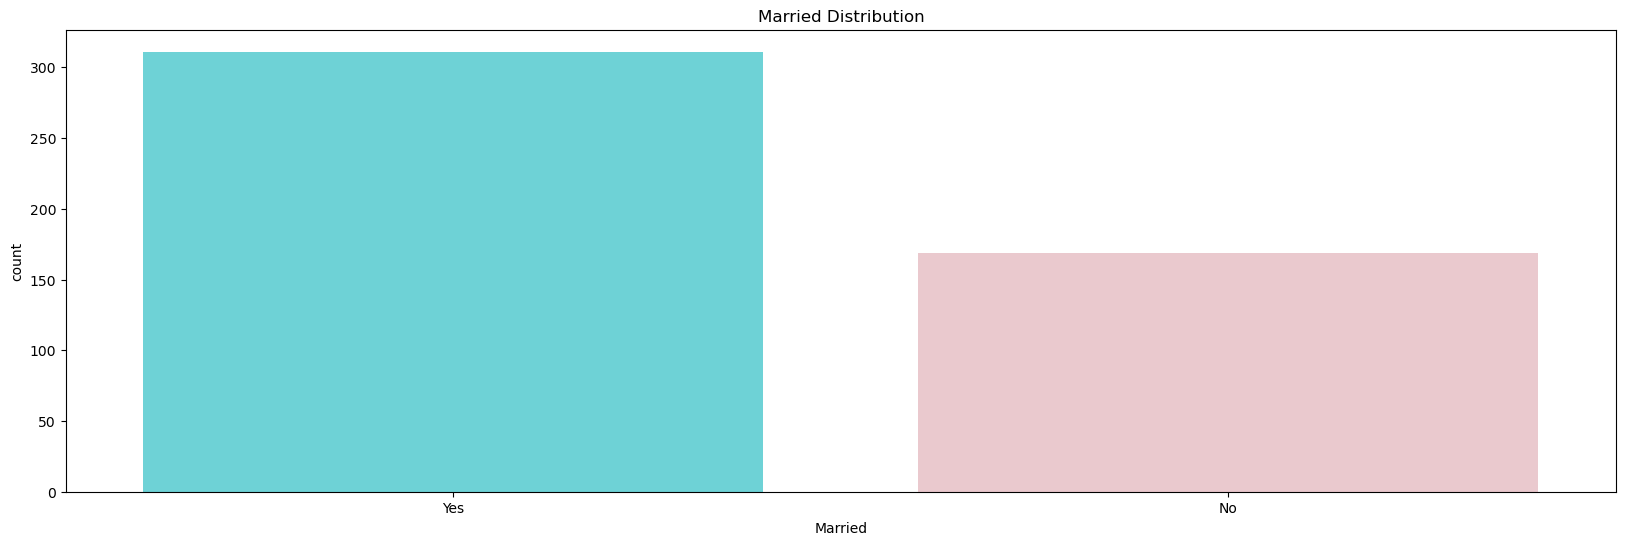

In [515]:
plt.figure(figsize=(20,6))
color=["#5DE2E7","#EFC3CA"]
sns.barplot(df.Married.value_counts(),palette=color)
plt.title("Married Distribution")

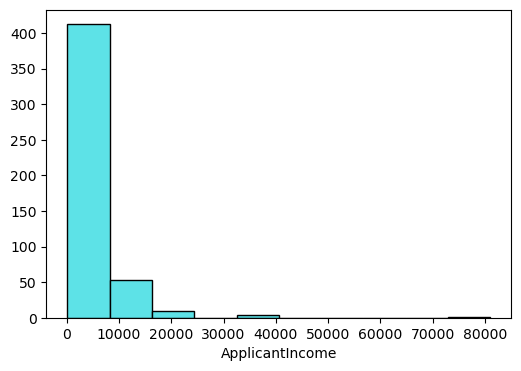

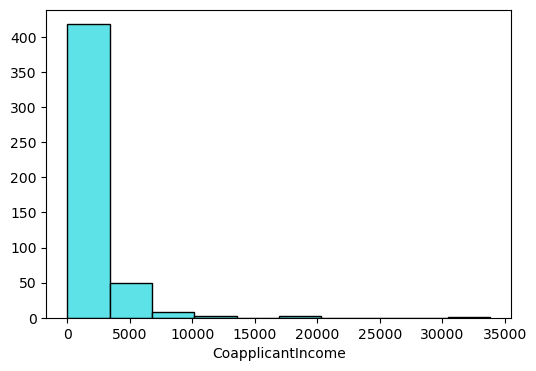

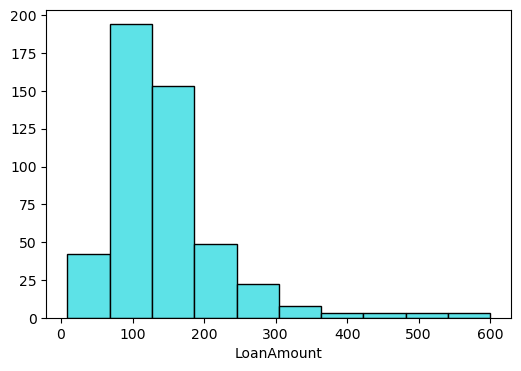

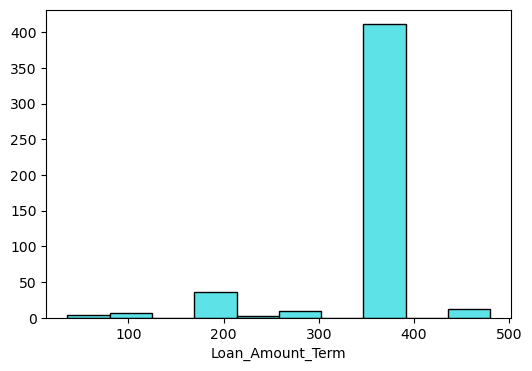

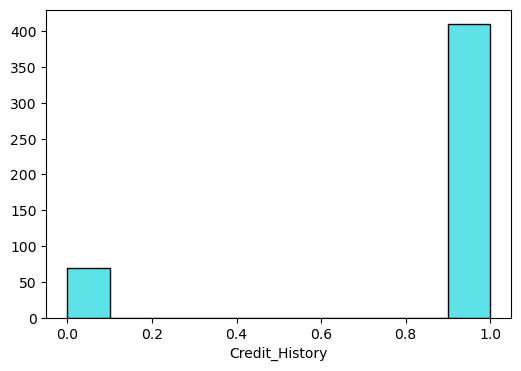

In [516]:
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.hist(df[i], bins=10, color='#5DE2E7', edgecolor='black')
    plt.xlabel(i)

In [517]:
df=df.drop("Loan_ID",axis=1)

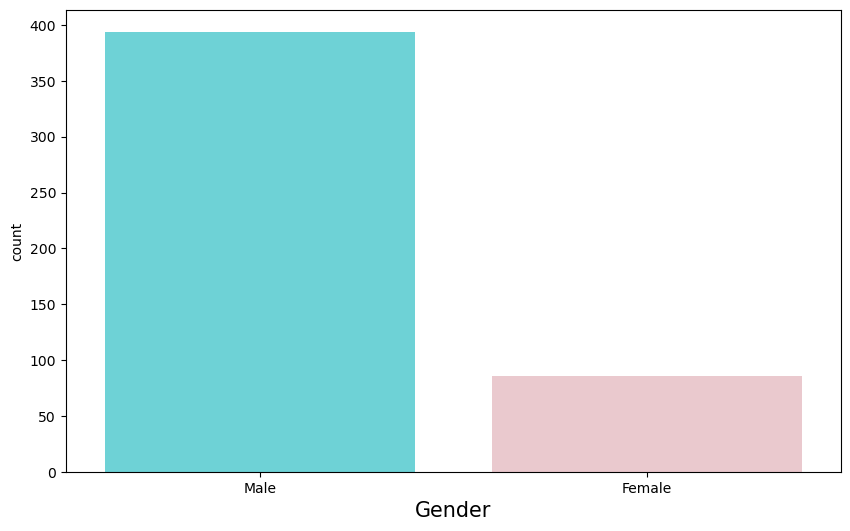

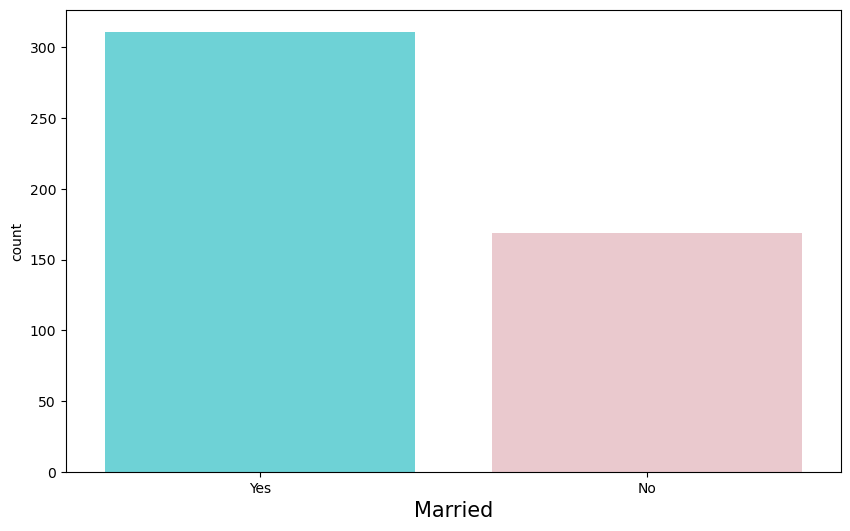

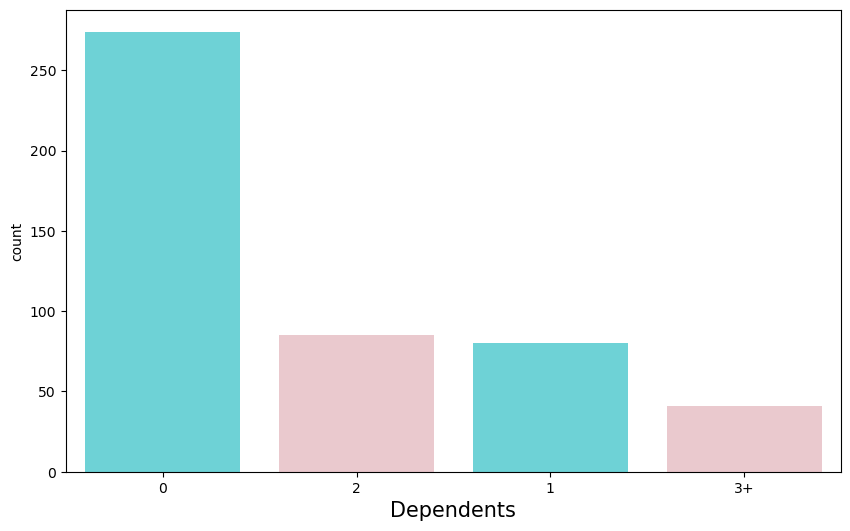

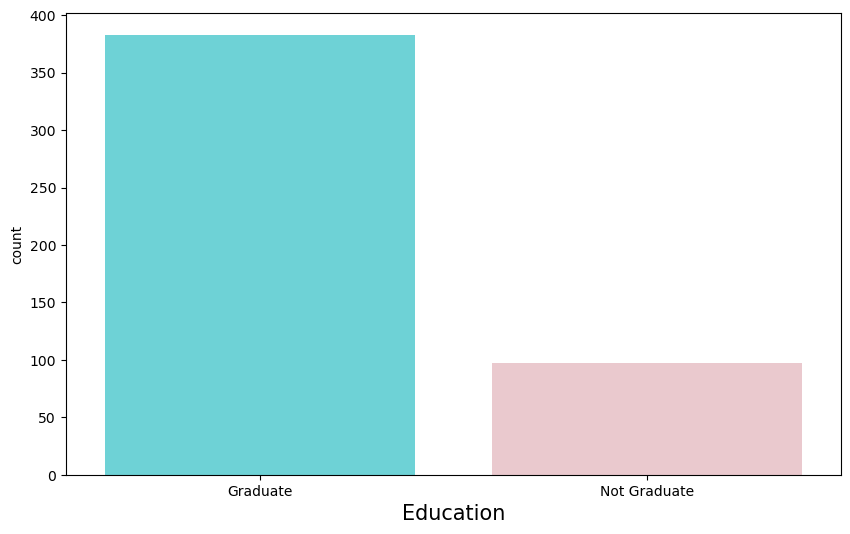

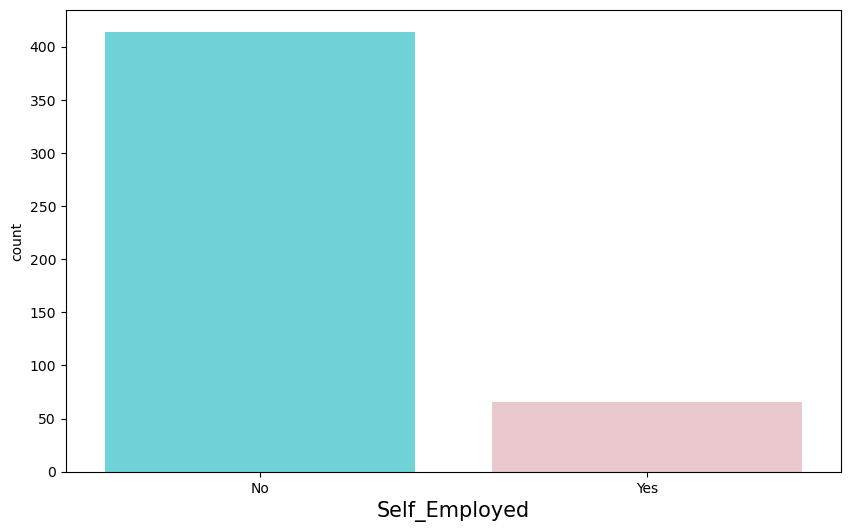

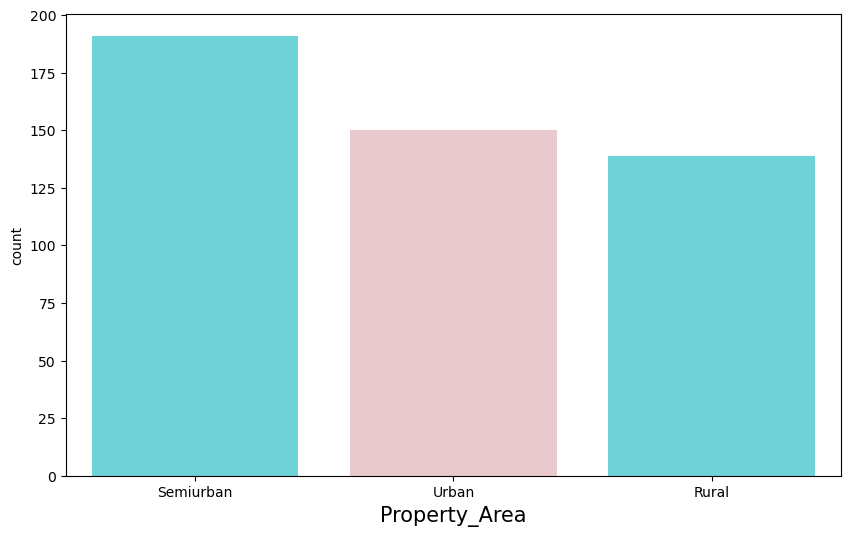

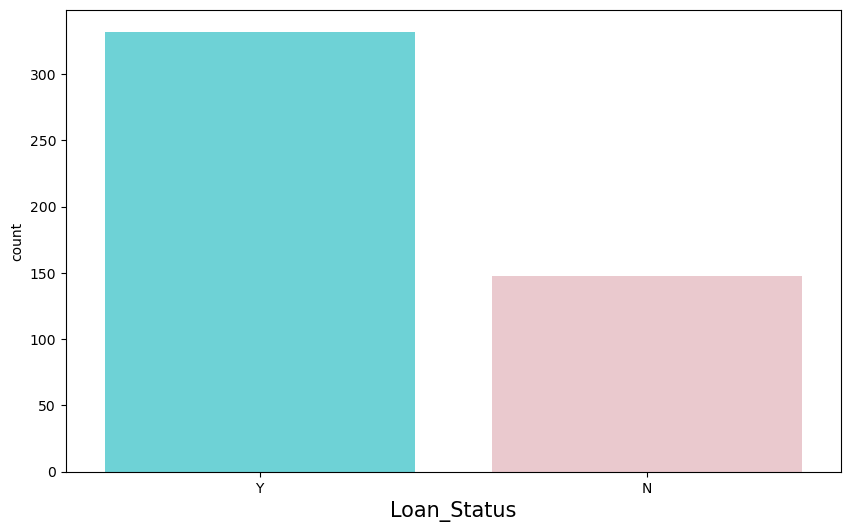

In [518]:
for i in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.barplot(df[i].value_counts(),palette=color)
    plt.xlabel(i,fontsize=15)

In [519]:
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

df.replace({'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)


<Axes: >

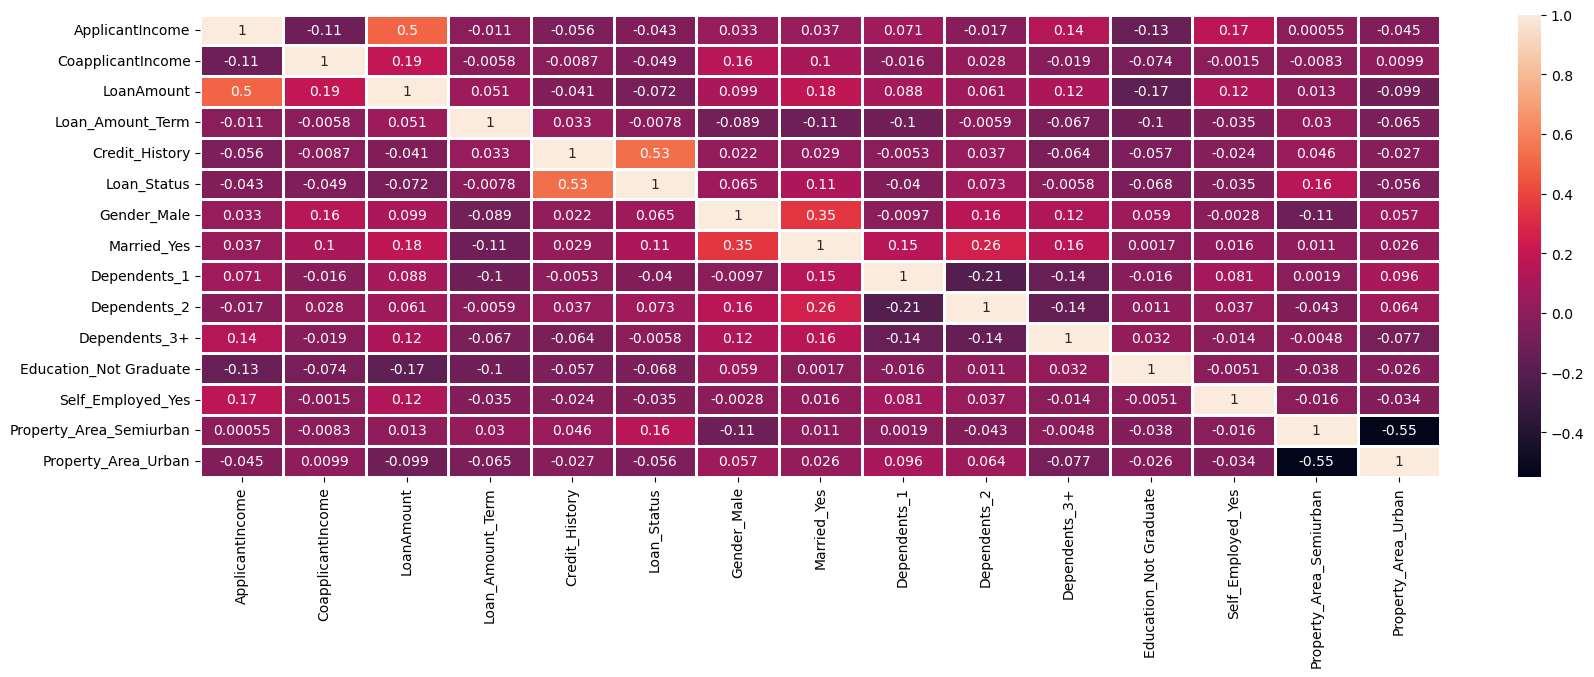

In [520]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,linewidths=1)

In [521]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,1,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,1,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,1,True,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,False,False,False,False,False,False,False,False,False
610,4106,0.0,40.0,180.0,1.0,1,True,True,False,False,True,False,False,False,False
611,8072,240.0,253.0,360.0,1.0,1,True,True,True,False,False,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,1,True,True,False,True,False,False,False,False,True


# Train and Test

In [523]:
target="Loan_Status"

x=df.drop(target,axis=1)
y=df[target]

In [524]:
#split the data

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)


In [525]:
model=SVC()
model.fit(xtrain,ytrain)

SVC()

In [526]:
ypred=model.predict(xtest)

In [527]:
acc=accuracy_score(ytest,ypred)
acc


0.75

In [528]:
report = classification_report(ytest, ypred)
print("The Report:\n", report)


The Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.75      1.00      0.86        72

    accuracy                           0.75        96
   macro avg       0.38      0.50      0.43        96
weighted avg       0.56      0.75      0.64        96

